In [2]:
import numpy as np
import pandas as pd
myData = pd.read_csv('../data/Thyroid_Diff.csv')
print(myData.shape)

(383, 17)


In [3]:
peek = myData.head(10)
print(peek)

   Age Gender Smoking Hx Smoking Hx Radiothreapy          Thyroid Function  \
0   27      F      No         No              No                 Euthyroid   
1   34      F      No        Yes              No                 Euthyroid   
2   30      F      No         No              No                 Euthyroid   
3   62      F      No         No              No                 Euthyroid   
4   62      F      No         No              No                 Euthyroid   
5   52      M     Yes         No              No                 Euthyroid   
6   41      F      No        Yes              No  Clinical Hyperthyroidism   
7   46      F      No         No              No                 Euthyroid   
8   51      F      No         No              No                 Euthyroid   
9   40      F      No         No              No                 Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    U

In [4]:
shape = myData.shape
print(shape)

(383, 17)


In [5]:
types = myData.dtypes
print(types)

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object


In [7]:
outcome_counts = myData.groupby('Recurred').size()
print(outcome_counts)

Recurred
No     275
Yes    108
dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from numpy import set_printoptions

label_encoder = LabelEncoder()

categorical_columns = ['Gender','Smoking','Hx Smoking','Hx Radiothreapy','Thyroid Function','Physical Examination','Adenopathy','Pathology','Focality','Risk','T','N','M','Stage','Response','Recurred']

for col in categorical_columns:
    myData[col] = label_encoder.fit_transform(myData[col])

In [10]:
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = myData.corr(method = 'pearson')
print(correlations)

                        Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
Age                   1.000   0.186    0.310       0.135            0.177             0.036   
Gender                0.186   1.000    0.622       0.176            0.236             0.038   
Smoking               0.310   0.622    1.000       0.253            0.298             0.018   
Hx Smoking            0.135   0.176    0.253       1.000            0.261             0.022   
Hx Radiothreapy       0.177   0.236    0.298       0.261            1.000            -0.113   
Thyroid Function      0.036   0.038    0.018       0.022           -0.113             1.000   
Physical Examination -0.093  -0.079   -0.067      -0.028           -0.013             0.097   
Adenopathy           -0.102  -0.216   -0.156      -0.050           -0.058            -0.044   
Pathology            -0.160  -0.024   -0.202      -0.095           -0.106             0.095   
Focality             -0.224  -0.208   -0.238      

<AxesSubplot:ylabel='Frequency'>

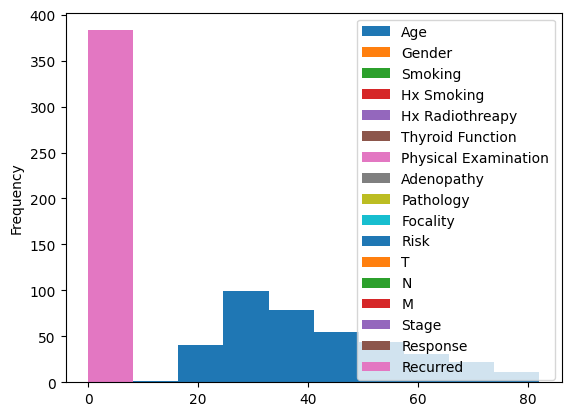

In [11]:
import matplotlib.pyplot as plt
myData.plot.hist()

In [12]:
myData.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize = (10,10))
plt.show()

ValueError: Layout of 3x3 must be larger than required size 17

<Figure size 1000x1000 with 0 Axes>

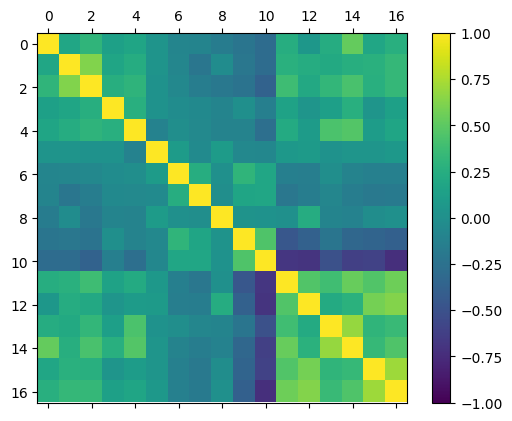

In [13]:
correlations = myData.corr()
# plot correlation matrix
myfig = plt.figure()
axis = myfig.add_subplot(111) # There is only one subplot or graph;
# "111" means "1x1 grid, first subplot"
cax = axis.matshow(correlations, vmin = -1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 9, 1)

In [14]:
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# from numpy import set_printoptions
# 
# label_encoder = LabelEncoder()
# 
# categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
# 
# for col in categorical_columns:
#     myData[col] = label_encoder.fit_transform(myData[col])

In [16]:
X = myData.drop('Recurred', axis=1).values
Y = myData['Recurred'].values

mydataScaler = MinMaxScaler(feature_range=(0, 1))
mydataRescaled = mydataScaler.fit_transform(X)

set_printoptions(precision=3)
print(mydataRescaled[20:25, :])

[[0.388 0.    0.    0.    0.    0.5   0.75  0.6   0.667 1.    1.    0.
  0.    0.    0.    0.333]
 [0.433 0.    0.    0.    0.    0.5   0.75  0.6   0.667 1.    1.    0.
  0.    0.    0.    0.333]
 [0.313 0.    0.    0.    0.    0.5   1.    0.6   0.667 1.    1.    0.
  0.    0.    0.    0.333]
 [0.821 0.    0.    0.    0.    0.5   1.    0.6   0.667 1.    1.    0.
  0.    0.    0.    0.333]
 [0.672 0.    0.    0.    0.    0.5   0.25  0.6   0.667 0.    1.    0.
  0.    0.    0.    0.333]]


In [17]:
from sklearn.preprocessing import LabelEncoder, Normalizer

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

mydata_train = myData.drop('Recurred', axis=1).values
mydata_label = myData['Recurred'].values

mydataScaler = Normalizer().fit(mydata_train)
mydataNormalized = mydataScaler.transform(mydata_train)

set_printoptions(precision=3)
print(mydataNormalized[20:25, :])

[[0.991 0.    0.    0.    0.    0.048 0.072 0.072 0.048 0.024 0.048 0.
  0.    0.    0.    0.024]
 [0.992 0.    0.    0.    0.    0.045 0.068 0.068 0.045 0.023 0.045 0.
  0.    0.    0.    0.023]
 [0.985 0.    0.    0.    0.    0.055 0.109 0.082 0.055 0.027 0.055 0.
  0.    0.    0.    0.027]
 [0.996 0.    0.    0.    0.    0.028 0.057 0.043 0.028 0.014 0.028 0.
  0.    0.    0.    0.014]
 [0.997 0.    0.    0.    0.    0.033 0.017 0.05  0.033 0.    0.033 0.
  0.    0.    0.    0.017]]


In [18]:
from sklearn.preprocessing import Binarizer

mydataBinarizer = Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized = mydataBinarizer.transform(mydata_train)
set_printoptions(precision = 3)
print(mydatabinarized[0:5,:])

[[1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1]
 [1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1]
 [1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1]
 [1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1]
 [1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1]]


In [19]:
from sklearn.feature_selection import SelectKBest, f_regression

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

min_value = myData.drop('Recurred', axis=1).min().min()
if min_value < 0:
    myData += abs(min_value)

mydata_train = myData.drop('Recurred', axis=1).values
mydata_label = myData['Recurred'].values

myFeature = SelectKBest(score_func=f_regression, k=4)
fit = myFeature.fit(mydata_train, mydata_label)

set_printoptions(precision=3)
print(fit.scores_)

[2.737e+01 4.599e+01 4.760e+01 7.188e+00 1.195e+01 1.757e+00 6.736e+00
 1.313e+01 4.078e-03 6.581e+01 4.434e+02 1.707e+02 2.538e+02 5.471e+01
 9.628e+01 3.850e+02]


In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
mydataRFE = RFE(model, n_features_to_select=4)
mydataFit = mydataRFE.fit(mydata_train, mydata_label)

print("Number of features selected: %d" % mydataFit.n_features_)
print("Selected features are denoted by True: %s" % mydataFit.support_)
print("Feature Ranking: %s" % mydataFit.ranking_)

Number of features selected: 4
Selected features are denoted by True: [False  True False  True False False False False False False  True False
 False False False  True]
Feature Ranking: [10  1  9  1  3 12  7 13  8  6  1  4  2  5 11  1]


In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
fit = pca.fit(mydata_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.962 0.013 0.007]
[[ 0.999  0.005  0.007  0.002  0.002  0.002 -0.008 -0.008 -0.009 -0.007
  -0.013  0.022  0.004  0.003  0.027  0.011]
 [-0.035  0.072  0.064  0.017  0.015  0.019 -0.364 -0.309  0.053 -0.146
  -0.278  0.625  0.335  0.044  0.2    0.339]
 [-0.006  0.018  0.033  0.01   0.012  0.071  0.83   0.306  0.028  0.008
  -0.13   0.359  0.152  0.038  0.123  0.156]]


In [22]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(383, 1)


In [23]:
pca=PCA(0.98)
selectedFeatures=pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(383, 3)


In [24]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

myData['Recurred'] = pd.cut(myData['Recurred'], bins=3, labels=[0, 1, 2])
mydata_label = myData['Recurred'].values

model = ExtraTreesClassifier()
model.fit(mydata_train, mydata_label)
print(model.feature_importances_)

[4.080e-02 2.231e-02 1.603e-02 5.400e-03 2.283e-04 2.030e-02 2.355e-02
 5.304e-02 1.312e-02 3.517e-02 1.753e-01 5.243e-02 1.455e-01 1.299e-02
 4.657e-02 3.373e-01]
